In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
#                        사람얼굴 70개            사진크기 resize

In [14]:
x = faces.data
y = faces.target
target_names = faces.target_names

In [15]:
target_names

array(['Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
       'Tony Blair'], dtype='<U17')

In [16]:
pd.Series(y).value_counts()

1    530
3    144
0    121
2    109
dtype: int64

In [19]:
x.shape         # column이 1850개인 고차원데이터 

(904, 1850)

In [26]:
x[1].reshape(50, 37)

array([[147.66667 , 171.      , 182.      , ...,  93.666664,  82.666664,
         75.      ],
       [167.      , 184.33333 , 185.66667 , ...,  90.      ,  83.333336,
         74.      ],
       [175.      , 183.33333 , 185.33333 , ...,  87.333336,  80.666664,
         73.      ],
       ...,
       [ 39.333332,  38.333332,  38.666668, ...,  93.      , 111.666664,
        118.333336],
       [ 40.666668,  39.333332,  37.666668, ...,  55.      ,  91.      ,
        112.333336],
       [ 43.333332,  39.333332,  37.333332, ...,  25.666666,  36.666668,
         73.666664]], dtype=float32)

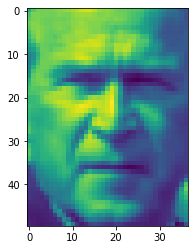

In [22]:
plt.imshow(x[1].reshape(50, 37))

In [40]:
n_samples, h, w = x.reshape(904, 50, 37).shape                 # 이미지수(데이터수), row t수, column 수
# shape을 변수에 저장

In [41]:
samples = x[:10].reshape(10, h, w)
samples

array([[[129.33333 , 150.66667 , 171.66667 , ..., 125.      ,
         125.666664, 104.333336],
        [149.33333 , 167.33333 , 180.66667 , ..., 119.      ,
         127.      , 113.666664],
        [167.33333 , 175.33333 , 180.66667 , ..., 113.666664,
         121.      , 113.666664],
        ...,
        [ 23.      ,  25.666666,  24.666666, ...,  33.333332,
          11.      ,   9.      ],
        [ 24.666666,  24.666666,  21.333334, ...,  16.333334,
          10.666667,   8.666667],
        [ 27.333334,  24.333334,  20.666666, ...,  11.666667,
           9.      ,   7.      ]],

       [[147.66667 , 171.      , 182.      , ...,  93.666664,
          82.666664,  75.      ],
        [167.      , 184.33333 , 185.66667 , ...,  90.      ,
          83.333336,  74.      ],
        [175.      , 183.33333 , 185.33333 , ...,  87.333336,
          80.666664,  73.      ],
        ...,
        [ 39.333332,  38.333332,  38.666668, ...,  93.      ,
         111.666664, 118.333336],
        [ 40

In [42]:
samples.shape

(10, 50, 37)

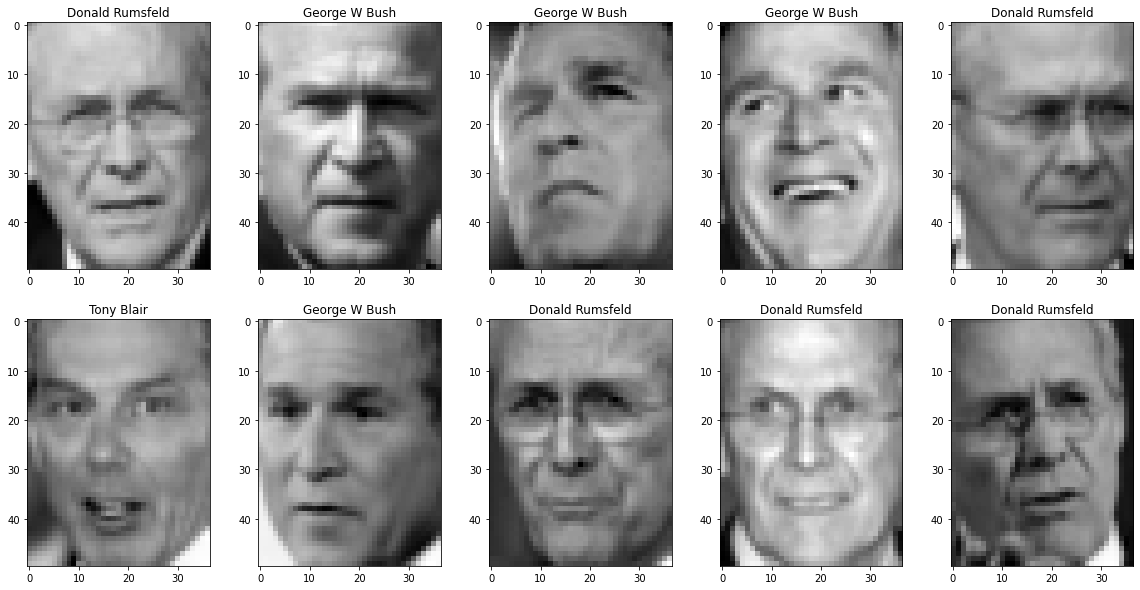

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]             # axes subplot
    ax.imshow(sample, cmap='gray')        # subplot!!!!!
    ax.set_title(target_names[y[idx]])

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [46]:
x[0]

array([129.33333 , 150.66667 , 171.66667 , ...,  11.666667,   9.      ,
         7.      ], dtype=float32)

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler   # 값차이가 너무 크면 정규화가 좋음
scaler = StandardScaler()                                         # 표준정규분포로 변환      -1~1
scaler.fit_transform(x_train)                          # 표준정규화 =>  통계 공부점....
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [52]:
x_train_scaled.shape

(723, 1850)

In [53]:
x_test_scaled.shape

(181, 1850)

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_scaled, y_train)
rfc.score(x_test_scaled, y_test)

0.7071823204419889

In [56]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scaled, y_train)
svc.score(x_test_scaled, y_test)

0.8011049723756906

In [ ]:
# PCA를 통해서 차원축소 후
# PCA Decompsition

In [57]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_scaled)

PCA()

In [58]:
pca.n_components_

723

In [59]:
pca = PCA(n_components=0.9)   # 
pca.fit(x_train_scaled)

PCA(n_components=0.9)

In [60]:
pca.n_components_          # x : 1030차원 데이터 => 75차원 데이터

65

In [61]:
x_train_scaled_pca = pca.transform(x_train_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled)

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_scaled_pca, y_train)
rfc.score(x_test_scaled_pca, y_test)

0.6906077348066298

In [63]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scaled_pca, y_train)
svc.score(x_test_scaled_pca, y_test)

0.8121546961325967

In [65]:
pca.components_.shape

(65, 1850)

In [68]:
eigenfaces = pca.components_.reshape((pca.n_components_, h, w))
samples = eigenfaces[:10]

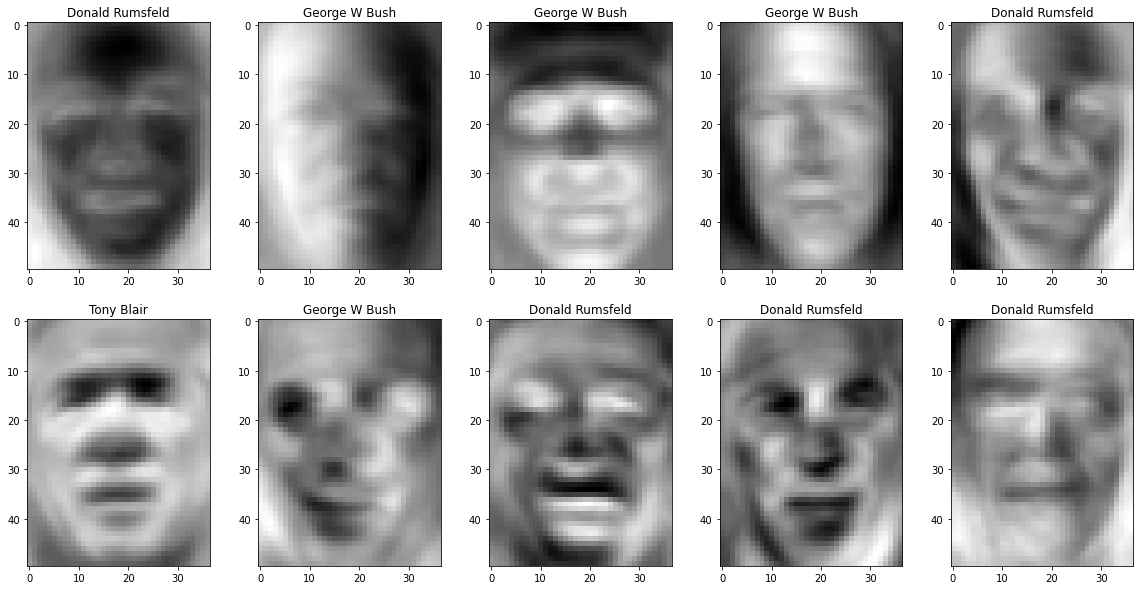

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap='gray')
    ax.set_title(target_names[y[idx]])